In [1]:
from tqdm import tqdm 
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import random
import copy

In [2]:
test_path= "/mnt/Personal/Projects/Depth_Reconstruction/Test_Folder/stereo_test/test_images/dustbin/im0.png"

In [3]:
from PIL import Image
import numpy as np

def load_image_to_rgb(image_path):
    """Load an image from path and return as RGB numpy array."""
    img = Image.open(image_path)
    return np.array(img.convert('RGB'))

In [4]:
import matplotlib.pyplot as plt

def display_image_array(img_array):
    """Display a numpy image array (2D or 3D) without axes."""
    plt.figure()
    if len(img_array.shape) == 3:  # RGB image
        plt.imshow(img_array)
    else:  # Grayscale
        plt.imshow(img_array, cmap='gray')
    plt.axis('off')
    plt.show()

In [5]:
import numpy as np
from PIL import Image

def resize_image_array(image_array, scale_factor):
    # Convert array to PIL Image
    if len(image_array.shape) == 2:
        # Grayscale image
        img = Image.fromarray(image_array)
    elif len(image_array.shape) == 3:
        # RGB/RGBA image
        img = Image.fromarray(image_array.astype('uint8'))
    else:
        raise ValueError("Input array must be 2D (grayscale) or 3D (color)")
    
    # Calculate new dimensions
    width, height = img.size
    new_width = int(width * scale_factor)
    new_height = int(height * scale_factor)
    
    # Resize using Lanczos resampling (high quality)
    resized_img = img.resize((new_width, new_height), Image.Resampling.LANCZOS)
    
    # Convert back to numpy array
    resized_array = np.array(resized_img)
    
    # Preserve original dtype for grayscale
    if len(image_array.shape) == 2:
        resized_array = resized_array.astype(image_array.dtype)
    
    return resized_array

In [6]:
def rgb_to_luminance(img_array):
    """Convert RGB image array to luminance (grayscale) using standard weights."""
    if len(img_array.shape) == 2:
        return img_array  # Already grayscale
    gray = np.dot(img_array[..., :3], [0.299, 0.587, 0.114]).astype(np.uint8)
    return gray.astype(np.int_)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from collections import Counter

def plot_colorized_segments(array_2d):
    
    # Calculate value occurrences (excluding zeros from frequency calculation)
    flat_array = array_2d.flatten()
    value_counts = Counter(flat_array)
    unique_values = np.array(sorted(value_counts.keys()))
    
    # Separate zero and non-zero values
    zero_exists = 0 in value_counts
    non_zero_values = unique_values[unique_values != 0] if zero_exists else unique_values
    
    # Create Viridis colormap for non-zero values
    if len(non_zero_values) > 0:
        non_zero_counts = np.array([value_counts[v] for v in non_zero_values])
        norm_counts = (non_zero_counts - non_zero_counts.min()) / \
                    (non_zero_counts.max() - non_zero_counts.min() + 1e-10)
        cmap = plt.cm.viridis # type: ignore
        
        # Assign colors (using 0.1-0.9 range of Viridis to avoid extremes)
        color_dict = {val: cmap(0.1 + 0.8*norm_counts[i]) 
                     for i, val in enumerate(non_zero_values)}
    
    # Always set 0 to black
    if zero_exists:
        color_dict[0] = (0, 0, 0, 1)  # Black with full opacity
    
    # Create RGB image
    rgb_image = np.zeros((*array_2d.shape, 3))
    for val in color_dict:
        rgb_image[array_2d == val] = color_dict[val][:3]  # Exclude alpha channel
    
    # Plot
    plt.figure(figsize=(10, 10))
    plt.imshow(rgb_image)
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    
    # return color_dict  # Optional: return the color mapping

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

def plot_value_occurrences(array_2d):
    """
    Plot the occurrence of values in a 2D array as a histogram.
    
    Args:
        array_2d: 2D numpy array with non-negative integer values
    """
    # Flatten array and count occurrences
    flat_array = array_2d.flatten()
    value_counts = Counter(flat_array)
    
    # Extract values and counts
    values = np.array(sorted(value_counts.keys()))
    counts = np.array([value_counts[v] for v in values])
    
    if values[0]==0:
        values=values[1:]
        counts=counts[1:]
    
    # Create figure
    plt.figure(figsize=(12, 6))
    
    # Plot histogram
    bars = plt.bar(values, counts, color='skyblue', edgecolor='black')
    
    # Add value labels on top of bars
    # for bar in bars:
    #     height = bar.get_height()
    #     plt.text(bar.get_x() + bar.get_width()/2., height,
    #              f'{int(height)}',
    #              ha='center', va='bottom')
    
    # Customize plot
    plt.xlabel('Value')
    plt.ylabel('Occurrences')
    plt.title('Value Occurrences in 2D Array')
    plt.grid(axis='y', alpha=0.5)
    
    # If there are many values, rotate x-axis labels
    if len(values) > 20:
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

In [9]:


# def random_texture_segmentation(image, threshold, max_iterations, max_texture):
#     """Segment image into textures using randomized flood fill."""
#     h, w = image.shape
#     output = np.zeros_like(image)
#     texture = 1
    
#     max_t = int(h*w*max_texture)
    
#     with tqdm(total=max_iterations, desc="Randomizing textures") as pbar:
#         for _ in range(max_iterations):
#             # Find unprocessed pixels
#             zero_pixels = np.argwhere(output == 0)
#             if len(zero_pixels) == 0:
#                 break
                
#             # Start from random unprocessed pixel
#             y, x = random.choice(zero_pixels)
#             current_value = image[y, x]
#             stack = [(y, x)]
            
#             texture_count=0
            
#             org_y, org_x = y, x
            
#             while stack:
#                 y, x = stack.pop()
#                 if output[y, x] != 0:
#                     continue
                    
#                 output[y, x] = texture
#                 texture_count+=1
                
                # if max(abs(y-org_y),abs(x-org_x))>max_t:
#                     continue
                
#                 # Check 4-connected neighbors
#                 for dy, dx in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
#                     ny, nx = y + dy, x + dx
                    
#                     # if (0 <= ny < h and 0 <= nx < w and abs(int(image[ny, nx]) - int(current_value)) <= threshold):
#                     if (0 <= ny < h and 0 <= nx < w and output[ny, nx] == 0 and output[ny, nx]!=texture and abs(int(image[ny, nx]) - int(current_value)) <= threshold):
                        
#                         stack.append((ny, nx))
            
#             texture += 1
#             pbar.update(1)
#             pbar.set_postfix({'Texture':texture})
    
#     return output

In [10]:

def complete_texture_segmentation(image, threshold, scale_stop, max_texture):
    """
    Segment image into textures using randomized flood fill until all pixels are processed.
    Shows progress with tqdm bar and displays current texture value.
    """
    h, w = image.shape
    output = np.zeros_like(image)
    texture = 1
    
    stop_value = int(h*w *scale_stop)
    
    max_t = int(np.sqrt(h*w*max_texture))
    
    # Initialize progress bar
    total_pixels = h * w
    
    with tqdm(total=total_pixels, desc="Segmenting textures") as pbar:
        # Update progress with initially filled pixels (probably 0)
        pbar.update(np.count_nonzero(output))
        
        while True:
            # Find all unprocessed pixels (value = 0)
            zero_pixels = np.argwhere(output == 0)
            if len(zero_pixels) < stop_value:
                break  # Exit when complete
            
            # Randomly select a starting pixel
            y, x = random.choice(zero_pixels)
            current_value = image[y, x]
            stack = [(y, x)]
            
            # Perform flood fill
            
            texture_count=0
            
            org_y, org_x = y, x
            
            while stack:
                y, x = stack.pop()
                if output[y, x] != 0:
                    continue
                    
                output[y, x] = texture
                texture_count+=1
                
                if max(abs(y-org_y),abs(x-org_x))>max_t:
                    continue
                
                # Check 4-connected neighbors
                for dy, dx in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                    ny, nx = y + dy, x + dx
                    if (0 <= ny < h and 0 <= nx < w and output[ny, nx]!=texture and abs(int(image[ny, nx]) - int(current_value)) <= threshold):
                        
                        stack.append((ny, nx))
            
            # Update progress bar
            pbar.update(texture_count)
            pbar.set_postfix({'Current texture': texture})
            
            texture += 1
    
    return output

In [11]:

def ordered_texture_segmentation(image, threshold, scale_stop, max_texture):
    """
    Segment image into textures using randomized flood fill until all pixels are processed.
    Shows progress with tqdm bar and displays current texture value.
    """
    return image

In [12]:


def extend_texture_segmentation(image, existing_segmentation, threshold, max_iterations, max_texture):
    """
    Extends existing texture segmentation with new random seeds.
    
    Args:
        image: 2D numpy array of input image (intensity values)
        existing_segmentation: 2D array with existing texture labels
        threshold: Maximum intensity difference for flood fill
        max_iterations: Maximum number of new seeds to try
        
    Returns:
        Updated texture segmentation array
    """
    output = existing_segmentation.copy()
    h, w = image.shape
    
    # Start new textures after existing ones
    texture = np.max(existing_segmentation) + 1 
    
    # Track processed pixels for progress bar
    total_pixels = h * w
    
    max_t = int(np.sqrt(h*w*max_texture))
    
    total_texture_fill=0
    
    
    
    with tqdm(total=max_iterations, desc="Extending textures") as pbar:
        iterations = 0
        
        while iterations < max_iterations:
            
            # Randomly select a starting pixel
            y = random.randint(0, h - 1)
            x = random.randint(0, w - 1)
            
            current_value = image[y, x]
            
            org_texture = output[y, x]
            
            # Check 4-connected neighbors
            do_iter = False
            
            for dy, dx in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                ny, nx = y + dy, x + dx
                if (0 <= ny < h and 0 <= nx < w and abs(int(image[ny, nx]) - int(current_value)) <= threshold):
                    if output[ny, nx] != org_texture:
                        do_iter = True
                        break
            
            if not do_iter:
                iterations += 1
                pbar.update(1)
                pbar.set_postfix({'Current texture': texture, 'Filled': (total_texture_fill/(h*w))})
                continue
                
            # Perform flood fill if not skipping
            stack = [(y, x)]
            texture_count=0
            
            org_y, org_x = y, x
            
            while stack:
                y, x = stack.pop()
                    
                output[y, x] = texture
                texture_count += 1
                
                if max(abs(y-org_y),abs(x-org_x))>max_t:
                    continue
                
                # Check 4-connected neighbors
                for dy, dx in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                    ny, nx = y + dy, x + dx
                    if (0 <= ny < h and 0 <= nx < w and output[ny, nx]!=texture and abs(int(image[ny, nx]) - int(current_value)) <= threshold):
                        stack.append((ny, nx))
                        
            total_texture_fill+=texture_count
            
            iterations += 1
            pbar.update(1)
            pbar.set_postfix({
                'Current texture': texture,
                'Filled': (total_texture_fill/(h*w))
            })
            
            texture += 1
    
    return output

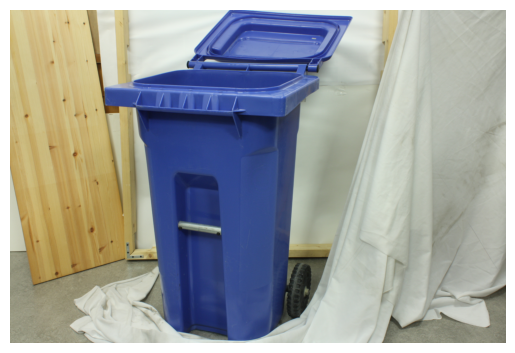

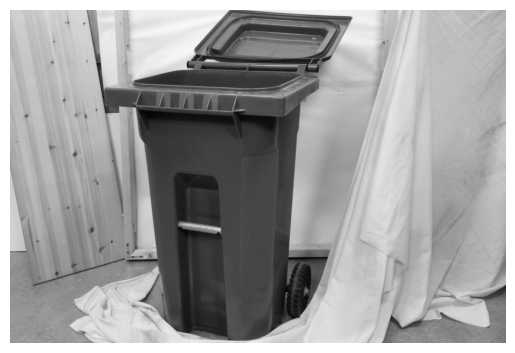

In [13]:
image_array = load_image_to_rgb(test_path)

rgb_array = resize_image_array(image_array,0.5)
gray_array = rgb_to_luminance(rgb_array)

display_image_array(rgb_array)
display_image_array(gray_array)

In [14]:
thresh=0.05
# random_iter=100
stop_comp =0.05

# random_fill_iter = 100
comp_fill_iter = 50
max_text = 0.001/4

print("Image Shape - ",gray_array.shape)
print("Total Pixels - ",(gray_array.shape[0]*gray_array.shape[1]))

th_val = thresh*255

# random_generate = random_texture_segmentation(gray_array,threshold=th_val,max_iterations=random_iter,max_texture=max_text)
complete_generate = complete_texture_segmentation(gray_array,threshold=th_val,scale_stop=stop_comp,max_texture=max_text)

# processed_generate = extend_texture_segmentation(gray_array,random_generate,threshold=th_val,max_iterations=random_fill_iter,max_texture=max_text)
refill_generate = extend_texture_segmentation(gray_array,complete_generate,threshold=th_val,max_iterations=comp_fill_iter,max_texture=max_text)

oreder_generate = ordered_texture_segmentation(gray_array, threshold=th_val, scale_stop=stop_comp, max_texture=max_text)

Image Shape -  (962, 1432)
Total Pixels -  1377584


Extending textures: 100%|██████████| 50/50 [00:00<00:00, 1488.17it/s, Current texture=3323, Filled=0.0123] 


1377.584


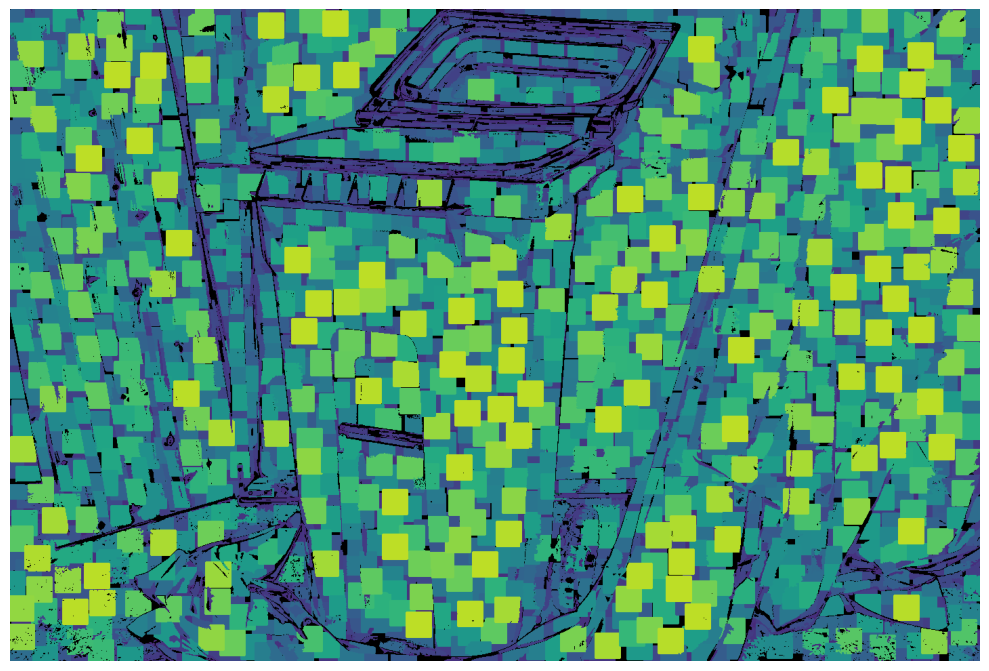

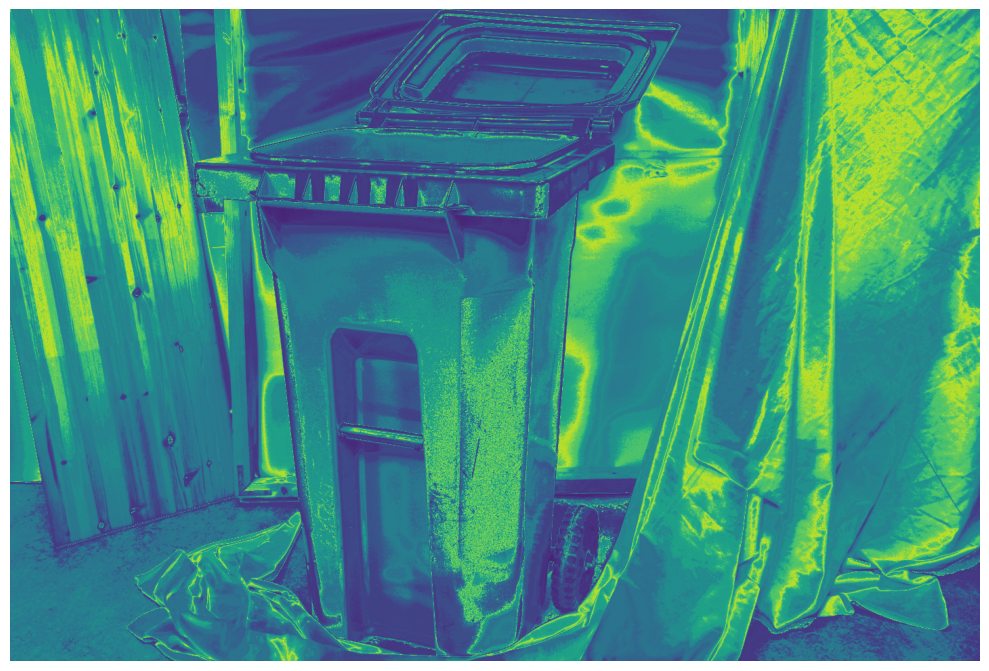

In [15]:
max_plot = (gray_array.shape[0]*gray_array.shape[1]) * max_text * 4
print(max_plot)

# # plot_colorized_segments(random_generate)
# plot_texture_array(complete_generate,max_plot)
# # plot_colorized_segments(processed_generate)
# plot_texture_array(refill_generate,max_plot)


# plot_colorized_segments(random_generate)
plot_colorized_segments(complete_generate)
# plot_colorized_segments(processed_generate)
# plot_colorized_segments(refill_generate)

plot_colorized_segments(oreder_generate)

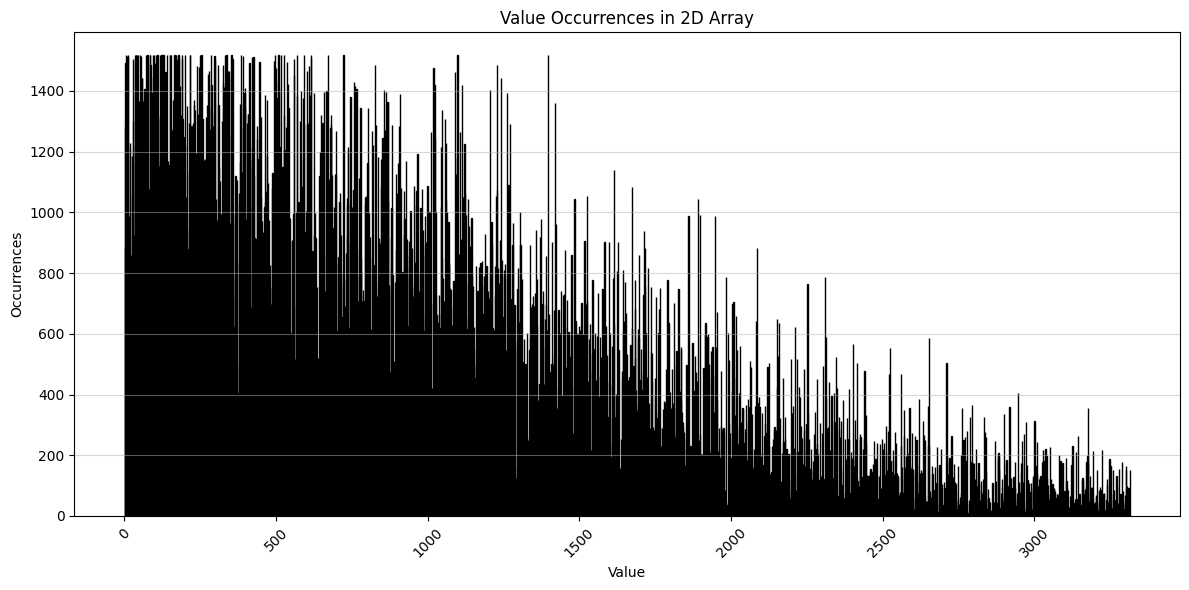

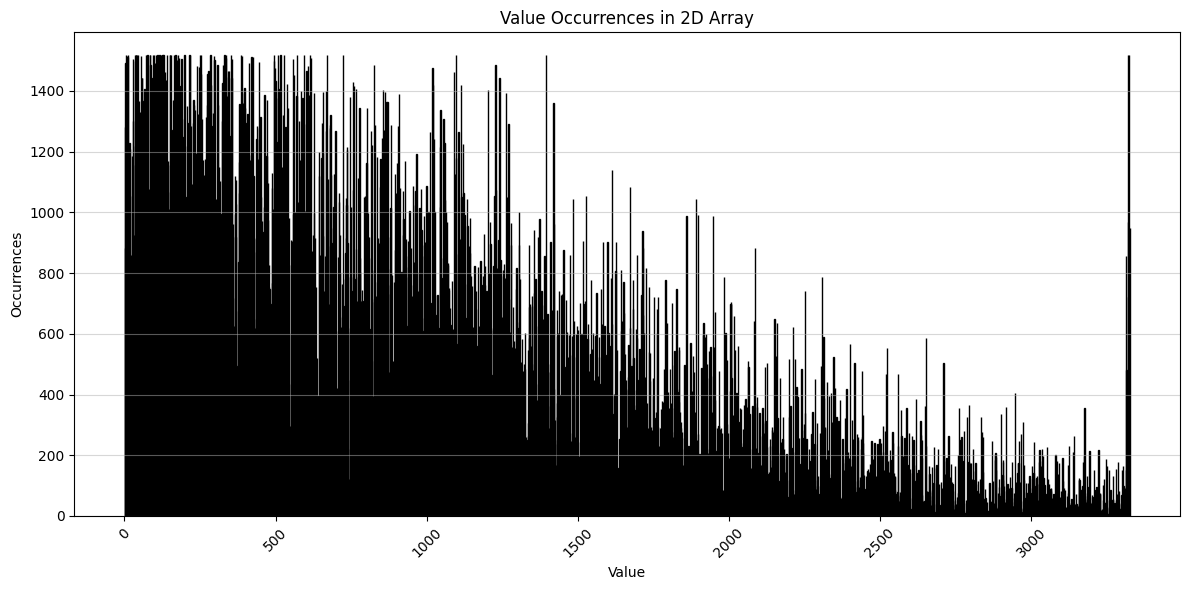

In [ ]:
plot_value_occurrences(complete_generate)
plot_value_occurrences(oreder_generate)
# plot_value_occurrences(refill_generate)

In [ ]:
import numpy as np
from collections import deque
from tqdm import tqdm

def compute_texture_data(image_array, texture_array):
    """
    Compute disparity values for texture regions using BFS and SAD matching.
    
    Args:
        image_array: 2D numpy array (image intensity values)
        texture_array: 2D numpy array (texture labels)
        
    Returns:
        disp_array: 2D numpy array of disparity values
    """
    # Initialize arrays
    height, width = texture_array.shape
    searched = np.zeros_like(texture_array, dtype=bool)
    
    texture_dict={}
    
    # Define 4-connected neighborhood
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    
    # Main processing loop with progress bar
    for y in tqdm(range(height), desc="Disparity Check"):
        for x in range(width):
            if searched[y, x]:
                continue
                
            current_texture = texture_array[y, x]
            if current_texture == 0:  # Skip background (if needed)
                searched[y, x] = True
                continue
                
            # BFS to find all connected pixels with same texture
            queue = deque([(y, x)])
            region = []
            
            while queue:
                cy, cx = queue.popleft()
                
                if searched[cy, cx]:
                    continue
                    
                searched[cy, cx] = True
                region.append((cy, cx))
                
                # Check neighbors
                for dy, dx in directions:
                    ny, nx = cy + dy, cx + dx
                    if (0 <= ny < height and 0 <= nx < width and 
                        not searched[ny, nx] and 
                        texture_array[ny, nx] == current_texture):
                        queue.append((ny, nx))
            
            # Calculate SAD for this region (example implementation)
            # Here we just use the mean intensity as a placeholder
            # Replace this with your actual SAD calculation
            region_sad = np.mean([image_array[py, px] for py, px in region])
            
            region_mean_pixel = [int(np.mean([y for y,_ in region])),int(np.mean([x for _,x in region]))]
            # Assign SAD value to all pixels in the region
            
            texture_dict[current_texture] = (region_sad, region_mean_pixel)
                
    return texture_dict

In [ ]:
image_map = copy.deepcopy(gray_array)
texture_map = copy.deepcopy(complete_generate)

